## Clustering: k-means and linkage-based clustering

In this notebook we are going to practice with the k-means and the linkage-based (called "agglomerative" in scikit learn) clustering algorithms.

In particular you are going to implement the k-means algorithm from scratch and to compare the results with the implementation already present in the sklearn library.

In [1]:
# Load the required packages
# If a package is missing in your setup, install it with 'conda install <package_name>' 
# or with 'pip install <package_name>'
%matplotlib inline  

import numpy as np
import scipy as sp
import imageio as imio
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

from mpl_toolkits.mplot3d import Axes3D #3d plotting functions
from matplotlib import pyplot
from PIL import Image

from copy import deepcopy  #deepcopy ensures that a copy of all the object data is performed (not just the pointers)

print ('scikit-learn version: ', sklearn.__version__)

scikit-learn version:  0.21.2


## TO DO:
    
Place your ID number in the ID variable, it will be used as random seed (as usual the random seed can affect a little bit the results, try to change it)

In [2]:
# fix your ID ("numero di matricola") and the seed for random generator
ID =   1077515
np.random.seed(ID)

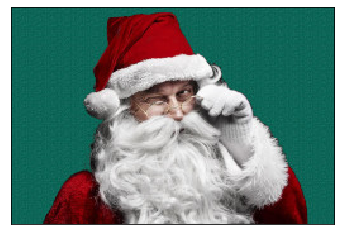

Santa Claus image:  (172, 256, 3)


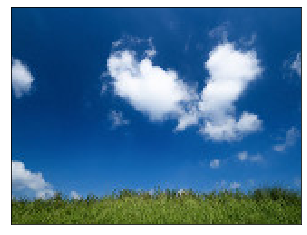

Landscape image:  (120, 160, 3)


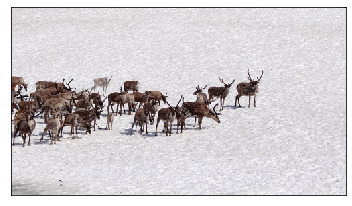

Reindeer image:  (281, 500, 3)


In [3]:
# load the provided images and display them (if you like you can experiment with other images)
image1 = imio.imread('data/santaclaus2.jpg')
image2  = imio.imread("data/landscape.jpg")
image3  = imio.imread("data/reindeer.jpg")



ax = plt.axes(xticks=[], yticks=[])
ax.imshow(image1)
plt.show()
print("Santa Claus image: ",image1.shape)

ax2 = plt.axes(xticks=[], yticks=[])
ax2.imshow(image2)
plt.show()
print("Landscape image: ",image2.shape)

ax3 = plt.axes(xticks=[], yticks=[])
ax3.imshow(image3)
plt.show()
print("Reindeer image: ",image3.shape)

We are going to start by using the Santa Claus image.


In [4]:
# reshape the data to a matrix of num_pixels x 3 
# (divide by 255 to have colors in [0 1] range for plotting functions of sklearn)

data = image1.reshape(image1.shape[0]*image1.shape[1], 3)/255

print(data.shape)
print(data)

(44032, 3)
[[0.05490196 0.4        0.34509804]
 [0.05098039 0.39607843 0.34117647]
 [0.05098039 0.39607843 0.34117647]
 ...
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]
 [0.05882353 0.40392157 0.34901961]]


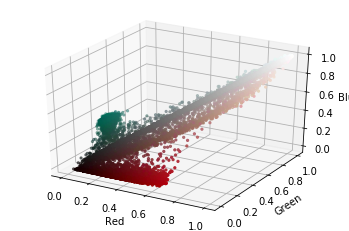

In [5]:
# Plot the points in the 3-dimensional space with normalized intervals between 0 and 1
# (corresponding to the three channels of the image, i.e. Red Green and Blue)

fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])

axis.scatter(r, g, b, c=data, s=5, marker="o")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
pyplot.show()

## TO DO 1
Implement the k-means algorithm manually (**do not use the kmeans function of sklearn and do not download implementations from other web sources**). The inputs to the function is the set of vectors to be clustered and the number of clusters. The output must contain the clusters barycenters, a vector associating each data point to the corresponding cluster and the error (value of the cost function) at each iteration.
Additionally, fix a maximum number of iterations of the k-means algorithm (e.g., 50).

Be careful about the initalization, you can use some random points from the training set, or get random values but ensure they are in the proper range. Poor initalizations can lead to the failure of the algorithm (in particular check that no cluster is initialized as empty, otherwise the algorithm can not update it).

In [72]:

import random
from sklearn.metrics import mean_absolute_error
def my_kmeans(points, k):
    max_iters=50
    counter = 0
    initial_points = random.sample(list(points), k)
    initial_points = [list(i) for i in initial_points]
    while counter<=max_iters:
        dist_init = np.empty(shape=(len(initial_points), len(points)))
        for i in range(len(initial_points)):
            for j in range(len(points)):
                dist_init[i,j] = sp.spatial.distance.euclidean(initial_points[i], points[j])
        labels=np.argmin(dist_init, axis=0)
        clusters_init = [[[0 for i in range(3)] for j in range(len(points))] for k in range(len(initial_points))]
        for i in range(len(initial_points)):
            for j in range(len(points)):
                if dist_init[i,j] < np.all(dist_init[:i-1,j]) and dist_init[i,j] < np.all(dist_init[i+1:,j]):
                    clusters_init[i][j]=points[j].tolist()
                else:
                    pass
        centroids = np.empty_like(initial_points).tolist()
        for i in range(len(initial_points)):
            col_totals = [sum(x) for x in zip(*clusters_init[i])]
            for j in range(len(col_totals)):
                col_totals[j] = col_totals[j]/(len(clusters_init[i]))
            centroids[i]=col_totals
        error = mean_absolute_error(initial_points, centroids)
        #print(counter)
        if np.all(initial_points) == np.all(centroids):
            initial_points=centroids
            break
        else:
            initial_points=centroids
        counter+=1
    return initial_points, labels, error, counter


## TO DO 2:

Now try the function you developed on the Santa Claus image with three clusters (k=3). 

Then plot the data points in the 3-dimensional space, each point must be coloured based on the membership to one of the clusters. Additionally, plot the respective clusters centroids (use a different shape, size or color to highlight the centroids).

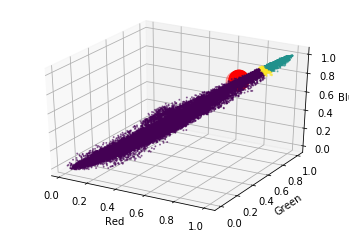

In [73]:

mykmeans_centers, clusters, error, iterations=my_kmeans(data, 3)


fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=clusters, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(mykmeans_centers[:][0], mykmeans_centers[:][1], mykmeans_centers[:][2], c='red', s=400, zorder=10)
pyplot.show()


### TO DO 3: 
Plot the value of the error versus the number of iterations

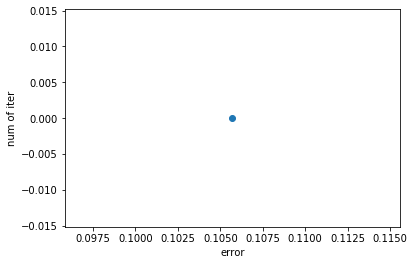

In [75]:
plt.scatter(error, iterations)
plt.xlabel('error')
plt.ylabel('num of iter')
plt.show()

### TO DO 4:
Now use the k-means function provided in sklearn. Pass to the function the number of clusters and use multiple random initializations (n_init parameter). Go to the documentation page for further details

In [6]:
kmeans_best = KMeans(n_clusters=3, n_init=30)
kmeans_best.fit(data)
clust_cent=kmeans_best.cluster_centers_
print(clust_cent)
print(kmeans_best.labels_)

[[0.07851465 0.39472584 0.34316203]
 [0.77992885 0.77037787 0.76769853]
 [0.39251291 0.0539599  0.06720644]]
[0 0 0 ... 0 0 0]


### TO DO 5:
Perform the same plot as above but with the output of the k-means function provided in sklearn.

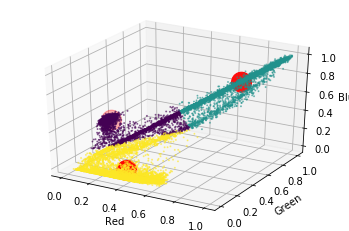

In [7]:
fig = pyplot.figure()
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
axis.scatter(r, g, b, marker="o", c=kmeans_best.labels_, s=1, cmap='viridis', zorder=0, alpha=0.5 )
axis.scatter(clust_cent[:,0], clust_cent[:,1], clust_cent[:,2], c='red', s=400, zorder=10)
pyplot.show()

## Question 1: 

Compare the results obtained with your implementation and with k-means from sklearn. Do you observe any differences, i.e., do the two plots match? 

[ANSWER]
Well I am not sure if mode code runs correctly or if it has some logical errors (I strongly believe that there are a lot of logical errors in my code), but also my code is able to distinguish three clusters, but the clusters are not convincing (same thing for the positions of the centroids) and are strongly different from the ones found by the sklearn algorithm.

### TO DO 6:

Now display the segmented image based on the 3 clusters found above with both the k-means functions by sklearn and your k-means implementation

In [76]:
# the following function is a rewrite of the function 'recreate_image'
# taken from: https://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html#sphx-glr-auto-examples-cluster-plot-color-quantization-py

def segment_image(to_segment, im_label): 
    image = np.zeros((to_segment.shape[0], to_segment.shape[1]))
    label_index = 0
    for i in range(to_segment.shape[0]):
        for j in range(to_segment.shape[1]):
            image[i,j] = im_label[j+i*(to_segment.shape[1]-1)+label_index]
        label_index += 1
    return image

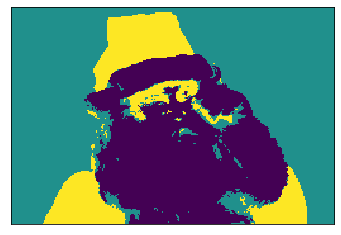

In [9]:
segmented_image = segment_image(image1, kmeans_best.fit_predict(data))

to_plot = plt.axes(xticks=[], yticks=[])
to_plot.imshow(segmented_image)
plt.show()

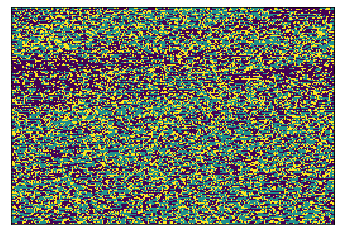

In [77]:
segmented_image_my = segment_image(image1, clusters)

to_plot_2 = plt.axes(xticks=[], yticks=[])
to_plot_2.imshow(segmented_image_my)
plt.show()

## Question 2: 

What do you observe? Do you think clustering is useful for image segmenation? And for image compression?  Comment your answer.

ANSWER:

I think that clustering can be useful both for image segmentation and image compression, because the image shown above (apart from colors) is comparable to the initial image in the sense that preserves the shape of the figures in the image. Of course the image has a lower quality, therefore I think that it can be useful for image compression.
About the segmentation using my code it is obvious that my code has a lot of logical errors and that is not able to segment the image nor to find the correct clusters.

## TO DO 8:

Now load the landscape image (optional: try also with the reindeer image) and segment it using kmeans with k varying from 2 to 15 clusters. You can use the sklearn implementation.

Then plot the resulting data points in the 3-dimensional space, each point must be colored based on the cluster membership. 
Additionally, plot the respective clusters centroids.



(19200, 3)
2 



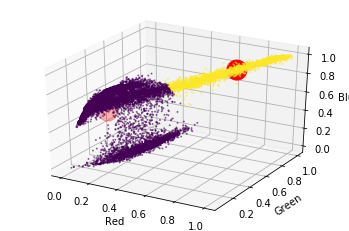

3 



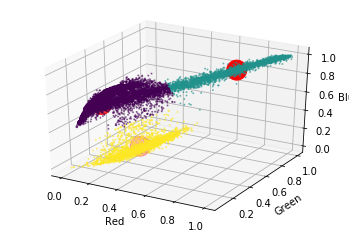

4 



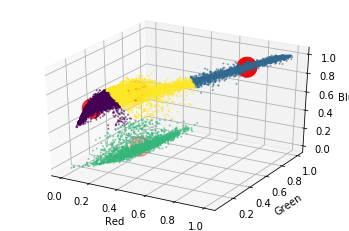

5 



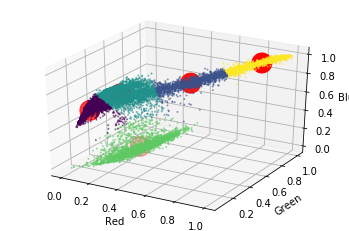

6 



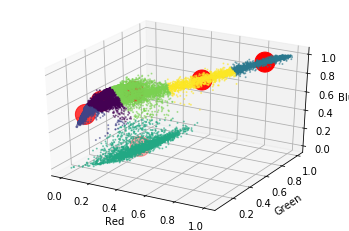

7 



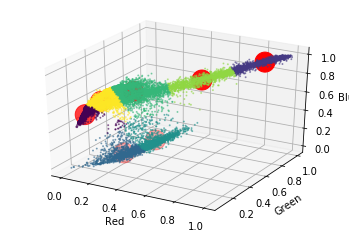

8 



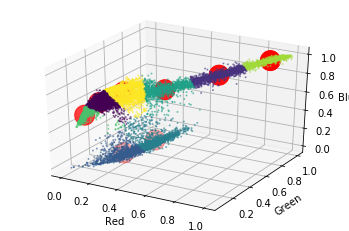

9 



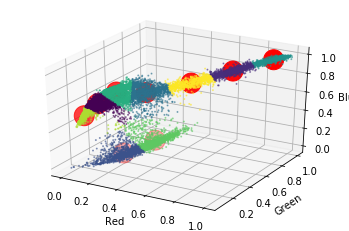

10 



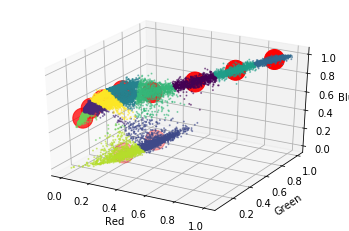

11 



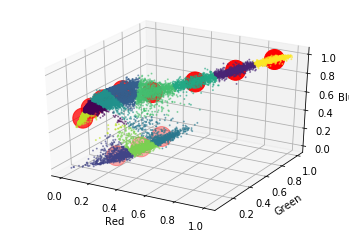

12 



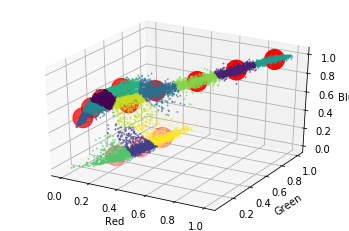

13 



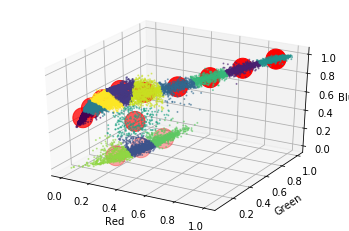

14 



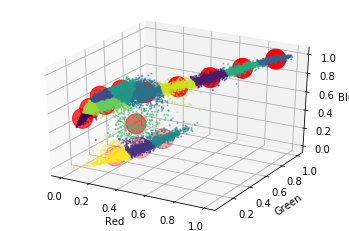

15 



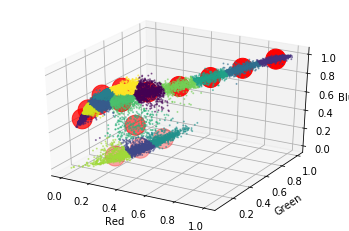

In [13]:
data = image2.reshape(image2.shape[0]*image2.shape[1], 3) / 255
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])
print(data.shape)


for k in range(2,16):
    kmeans_land=KMeans(n_clusters=k)
    kmeans_land.fit(data)
    print(k, '\n')
    fig = pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.scatter(r, g, b, marker="o", c=kmeans_land.labels_, s=1, cmap='viridis', zorder=0, alpha=0.5 )
    axis.scatter(kmeans_land.cluster_centers_[:,0], kmeans_land.cluster_centers_[:,1], kmeans_land.cluster_centers_[:,2], c='red', s=400, zorder=10)
    pyplot.show()

## TO DO 9:

Plot for different values of k (e.g. k between 2 and 15) the respective error of the kmeans algorithm 

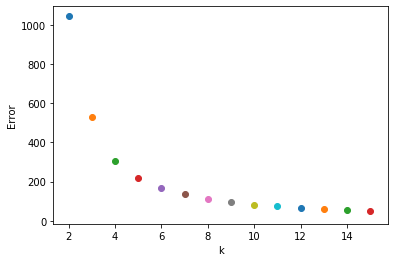

In [11]:
for k in range(2,16):
    kmeans_land=KMeans(n_clusters=k)
    kmeans_land.fit(data)
    plt.scatter(k, kmeans_land.inertia_)
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

(140500, 3)
2 



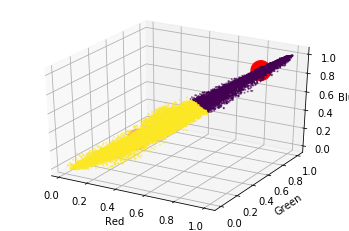

3 



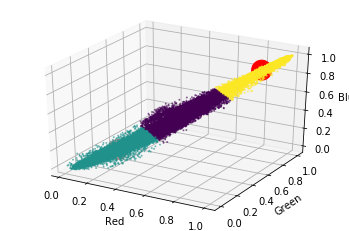

4 



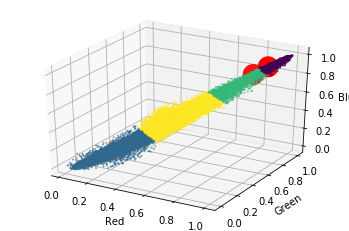

5 



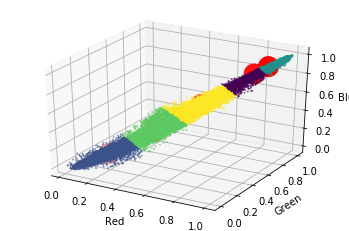

6 



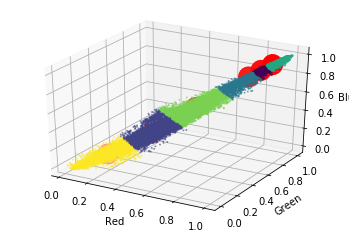

7 



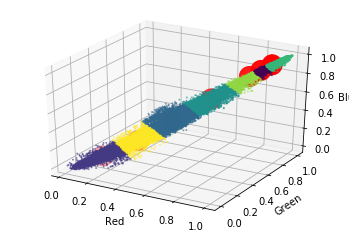

8 



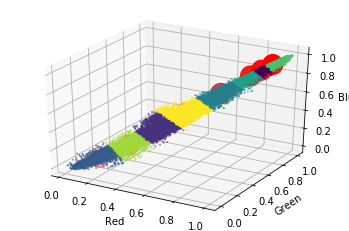

9 



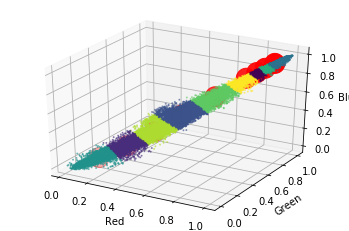

10 



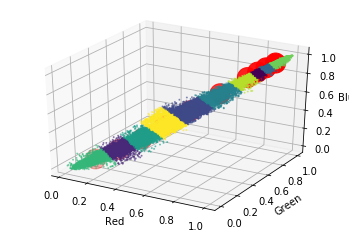

11 



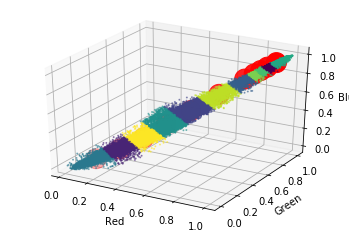

12 



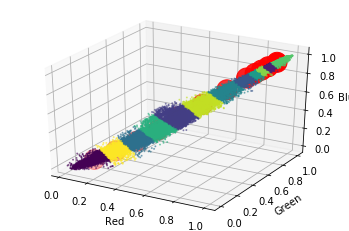

13 



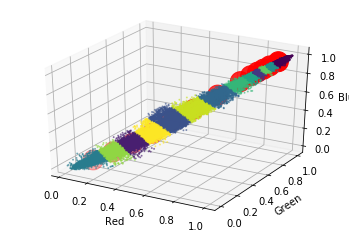

14 



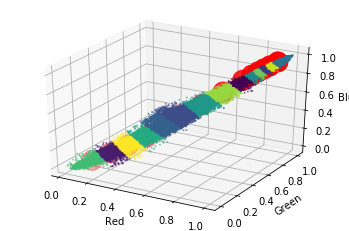

15 



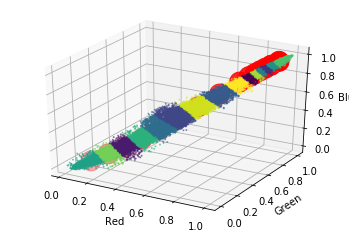

In [33]:
# reindeer image

data = image3.reshape(image3.shape[0]*image3.shape[1], 3) / 255
r, g, b = list(data[:,0]), list(data[:,1]), list(data[:,2])
print(data.shape)

for k in range(2,16):
    kmeans_land=KMeans(n_clusters=k)
    kmeans_land.fit(data)
    print(k, '\n')
    fig = pyplot.figure()
    axis = fig.add_subplot(1, 1, 1, projection="3d")
    axis.set_xlabel("Red")
    axis.set_ylabel("Green")
    axis.set_zlabel("Blue")
    axis.scatter(r, g, b, marker="o", c=kmeans_land.labels_, s=1, cmap='viridis', zorder=0, alpha=0.5 )
    axis.scatter(kmeans_land.cluster_centers_[:,0], kmeans_land.cluster_centers_[:,1], kmeans_land.cluster_centers_[:,2], c='red', s=400, zorder=10)
    pyplot.show()

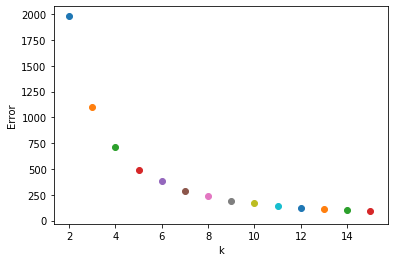

In [34]:
for k in range(2,16):
    kmeans_land=KMeans(n_clusters=k)
    kmeans_land.fit(data)
    plt.scatter(k, kmeans_land.inertia_)
plt.xlabel('k')
plt.ylabel('Error')
plt.show()

##  Question 3:

Compare the results with different values of k, what do you observe? 

Analyze also the error, which one do you think is the optimal value of k ?

Is there a single, clear answer ? 

[ANSWERS]

An increase in k corresponds in an increase of the clusters (of course), but I would say that above some value (around 8 or 9), the clustering remains almost the same as the error does, therefore I would think that k around 8-9-10 is an optimal value. But of course the error is almost 0 for larger value of k, therefore I would also prefer a large value for k if I want an high precision.
In conclusion no, there is not a clear answer, I think that it depends on the situation. For example if my task is an image compression or I want a fast algorithm, I would go for a small value of k, but if I want to minimize the error and it is not necessary to have a fast algorithm, I would go with a larger value for k.
Note: I tried also with the reindeer image, and I found similar results (but the errors for the reindeer image seem higher)

## Linkage-based clustering

The second part of the assignment concern instead linkage-based clustering. We will use the AgglomerativeClustering module of sklearn. 

In [14]:
# Import required packages
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics, datasets
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# Load sample data
data = np.load('data/moon_data.npz')
print(data.files)
X = data['X']
labels_true = data['labels_true']

['X', 'labels_true']


### TO DO 10: 

Now exploit the AgglomerativeClustering algorithm on the provided sample data points. Use the "single" linkage type that correspond to the minimum distance criteria seen in the lectures and 2 clusters. Notice that the "single" option has been introduced recently in sklearn, if you get an error ensure you have a recent version of the library. Plot the resulting clustering.

In [15]:
# #############################################################################
# Compute Agglomerative Clustering

db = AgglomerativeClustering(n_clusters=2, linkage='single')

db.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=2,
                        pooling_func='deprecated')

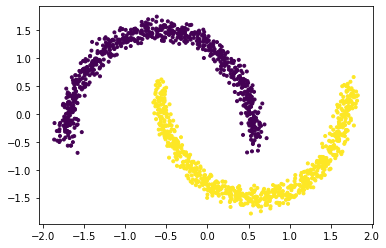

In [18]:
# Plot result

plt.scatter(X[:,0], X[:,1], c=db.labels_, marker='.')

### TO DO 11: 

Now try the KMeans with two clusters on the same dataset we used for the AgglomerativeClustering algorithm.

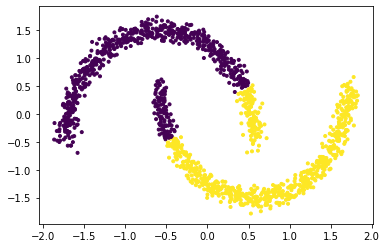

In [19]:
kmeans_best = KMeans(n_clusters=2, n_init=20)
kmeans_best.fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans_best.labels_, marker='.')

## Question 4:

Compare the results of K-means and Agglomerative Clustering and explain what you observe and why?



[ANSWER]
In this case the results of the k-means are not so good, therefore I think that a clustering based on distances is not a good choice. On the other hand, the agglomerative clustering is able to perform the clustering in the right way, therefore the linkage-based clustering seems better for this kind of problems.